In [1]:
!kaggle datasets download jiwasambhuwara/food-ingredients

food-ingredients.zip: Skipping, found more recently modified local copy (use --force to force download)


In [1]:
import os
import numpy as np
import zipfile
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

In [3]:
data_path = './data'
# Check if the folder exists
if os.path.exists(data_path):
    # Delete the folder and all its contents
    shutil.rmtree(data_path)
else:
    print(f"The folder {data_path} does not exist.")

In [4]:
os.mkdir('data')
with zipfile.ZipFile('food-ingredients.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

In [5]:
src_dir = './data/Food Dataset'
dst_dir = './data'

for root, dirs, files in os.walk(src_dir):
    for dir in dirs:
        # Join the root directory with the current directory to create the full path
        current_dir = os.path.join(root, dir)
        # Move the current directory and all its contents to the destination directory
        shutil.move(current_dir, dst_dir)

In [6]:
os.rmdir('./data/Food Dataset')

In [2]:
# Define the training and validation base directories
train_dir = './data/train'
test_dir = './data/test'
val_dir = './data/val'

labels = [name for name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, name))]

In [4]:
# Move each file in test folder to train folder
for label in labels:
    # Get a list of all the files in the source directory
    files = os.listdir(os.path.join(test_dir, label))

    # Move each file to the target directory
    for f in files:
        # Construct the full path to the file
        src_path = os.path.join(test_dir, os.path.join(label, f))
        dst_path = os.path.join(train_dir, os.path.join(label, f))
        shutil.move(src_path, dst_path)

FileNotFoundError: [WinError 3] The system cannot find the path specified: './data/test\\Alpukat'

In [9]:
# Use shutil.rmtree() to delete the folder and its subfolders
shutil.rmtree('./data/test')

Sample Alpukat image:


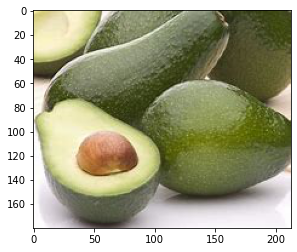

Sample Anggur image:


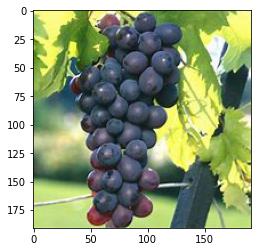

Sample Apel image:


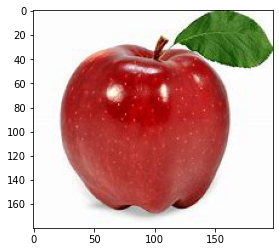

Sample Asparagus image:


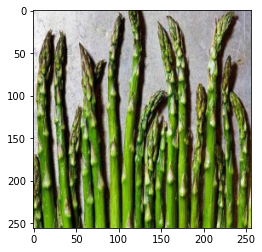

Sample Brokoli image:


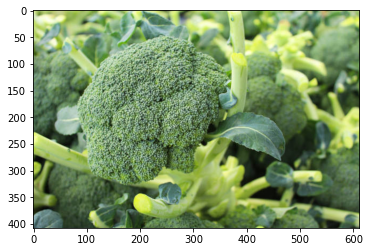

Sample Buah naga image:


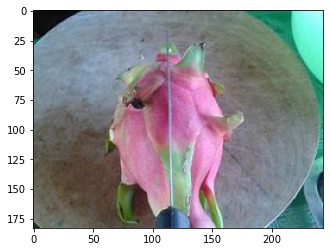

Sample Ceker ayam image:


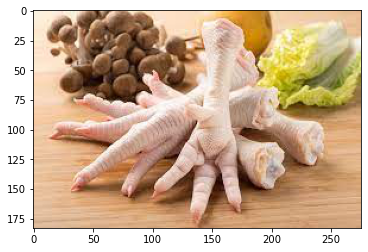

Sample Dada ayam image:


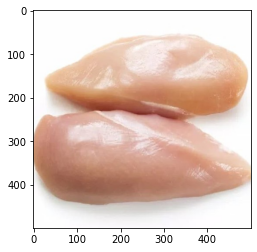

Sample Durian image:


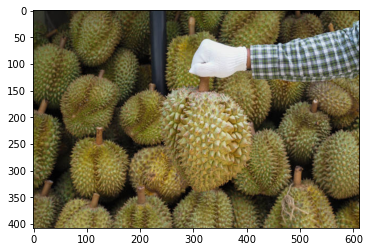

Sample Jagung image:


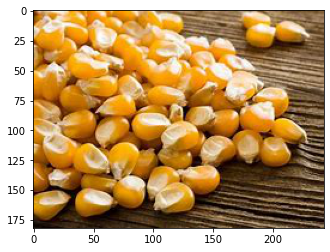

Sample Jambu Air image:


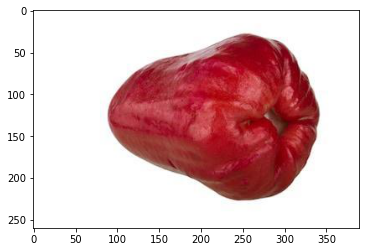

Sample Jeruk image:


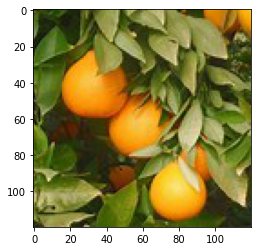

Sample Kacang Mete image:


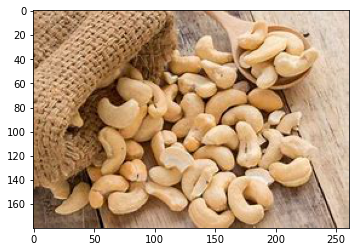

Sample Kacang polong image:


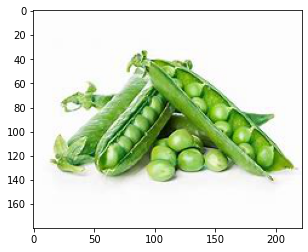

Sample Kacang tanah image:


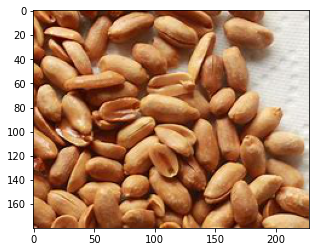

Sample Kangkung image:


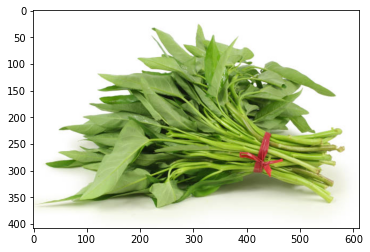

Sample Kelapa image:


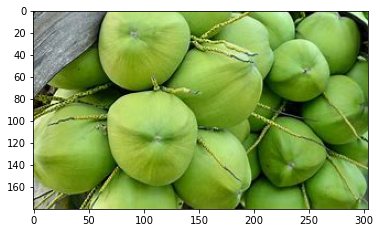

Sample Kembang Kol image:


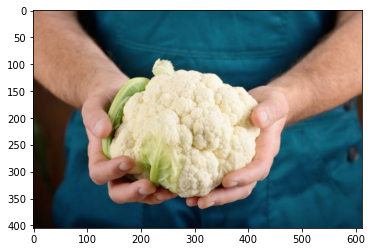

Sample Kentang image:


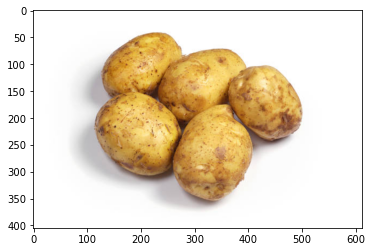

Sample Klengkeng image:


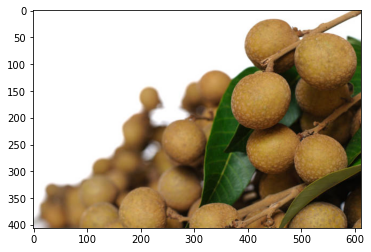

Sample Kulit ayam image:


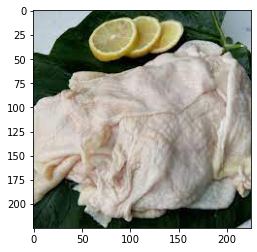

Sample Labu image:


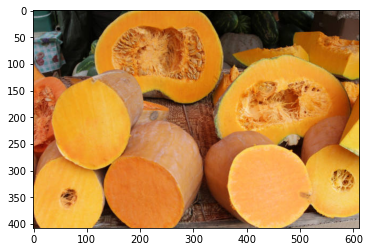

Sample Labu Siam image:


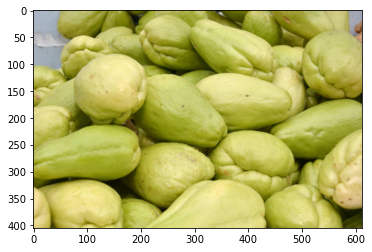

Sample Leci image:


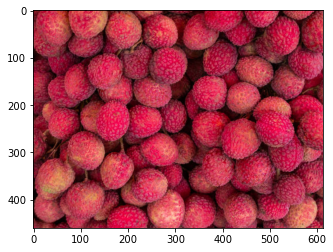

Sample Lemon image:


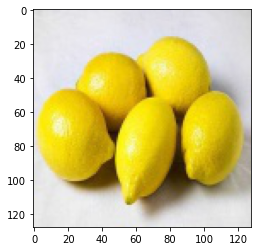

Sample Lobak Merah image:


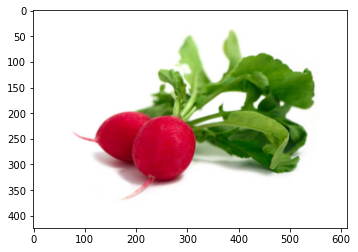

Sample Mangga image:


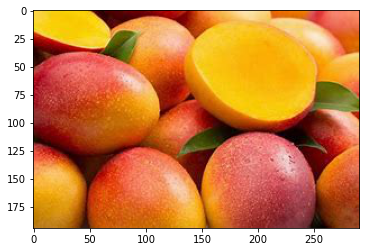

Sample Melon image:


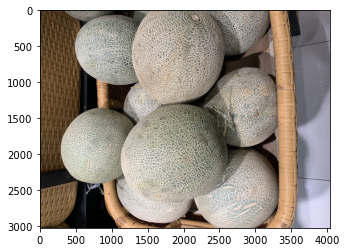

Sample Mentimun image:


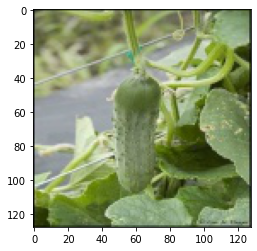

Sample Nanas image:


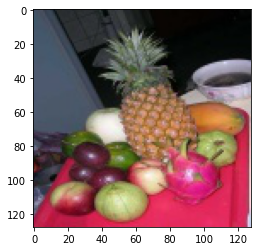

Sample Nangka image:


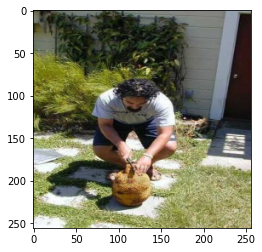

Sample Nasi merah image:


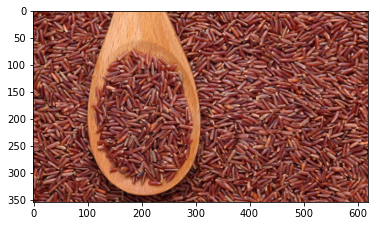

Sample Nasi putih image:


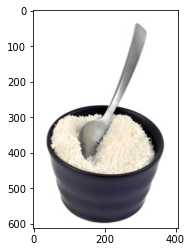

Sample Paha bawah ayam image:


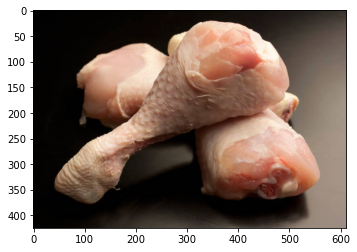

Sample Paprika image:


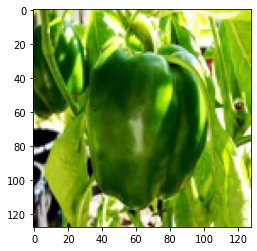

Sample Pare image:


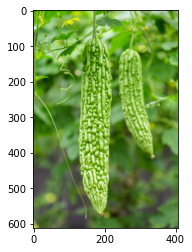

Sample Pepaya image:


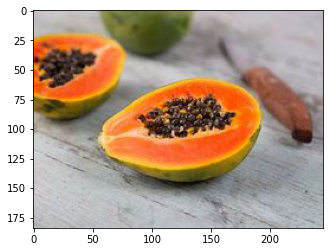

Sample Pir image:


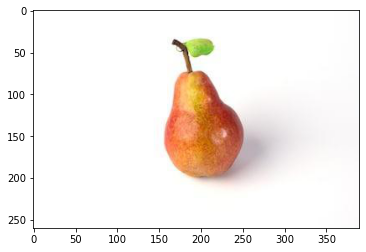

Sample Pisang image:


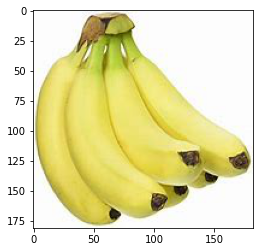

Sample Pokcoy image:


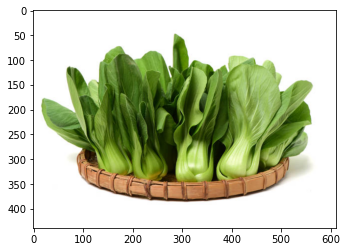

Sample Pork belly image:


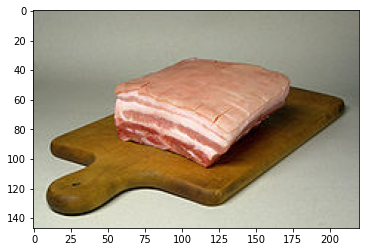

Sample Rambutan image:


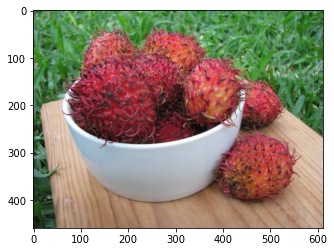

Sample Salmon image:


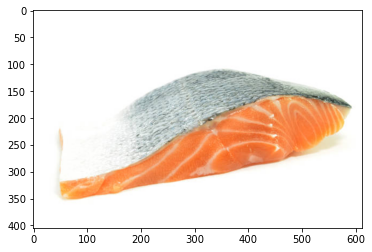

Sample Sayap Ayam image:


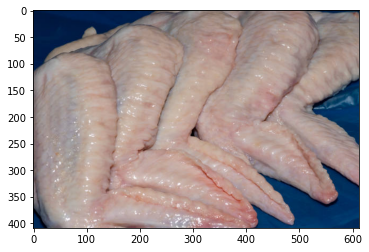

Sample Semangka image:


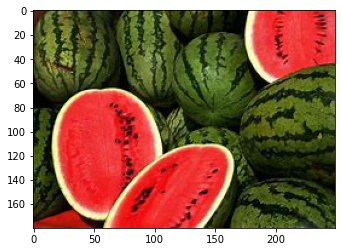

Sample Singkong image:


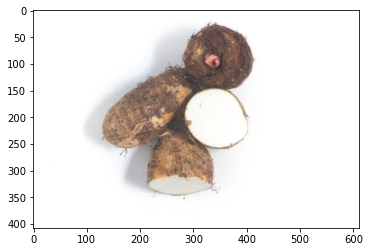

Sample Stroberi image:


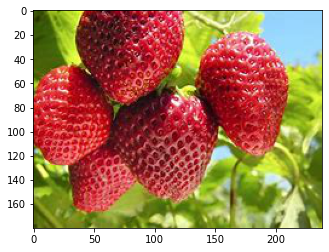

Sample Tahu image:


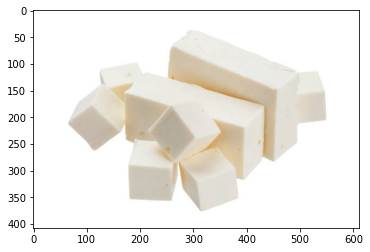

Sample Tauge image:


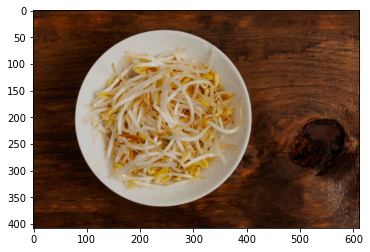

Sample Telur image:


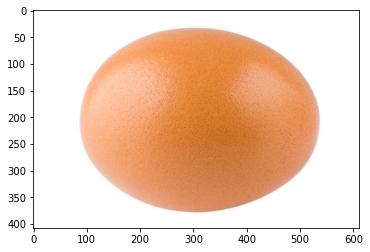

Sample Tempe image:


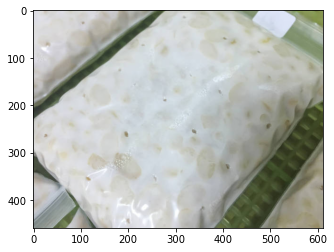

Sample Terong image:


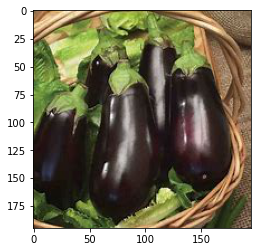

Sample Tomat image:


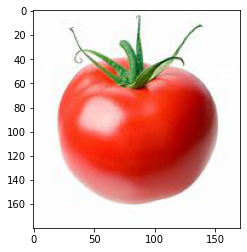

Sample Ubi image:


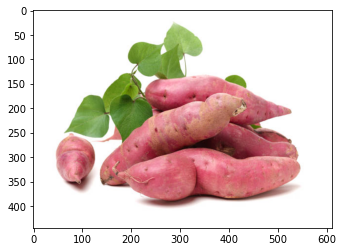

Sample Wortel image:


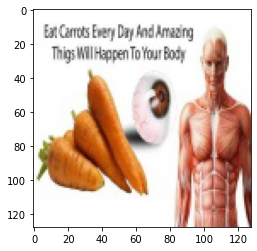

In [3]:
for i in range(len(labels)):
    print(f"Sample {labels[i]} image:")
    plt.imshow(load_img(f"{os.path.join(os.path.join(train_dir, labels[i]), os.listdir(os.path.join(train_dir, labels[i]))[0])}"))
    plt.show()

In [5]:
for i in range(len(labels)):
    # Load the first example of a ingredient
    sample_image  = load_img(f"{os.path.join(os.path.join(train_dir, labels[i]), os.listdir(os.path.join(train_dir, labels[i]))[0])}")

    # Convert the image into its numpy array representation
    sample_array = img_to_array(sample_image)

    print(f"image has shape: {sample_array.shape}")

image has shape: (180, 213, 3)
image has shape: (191, 191, 3)
image has shape: (180, 198, 3)
image has shape: (256, 256, 3)
image has shape: (408, 612, 3)
image has shape: (183, 244, 3)
image has shape: (183, 276, 3)
image has shape: (500, 500, 3)
image has shape: (408, 612, 3)
image has shape: (182, 243, 3)
image has shape: (260, 390, 3)
image has shape: (120, 120, 3)
image has shape: (180, 261, 3)
image has shape: (180, 222, 3)
image has shape: (180, 228, 3)
image has shape: (408, 612, 3)
image has shape: (180, 304, 3)
image has shape: (405, 612, 3)
image has shape: (405, 612, 3)
image has shape: (406, 612, 3)
image has shape: (225, 225, 3)
image has shape: (408, 612, 3)
image has shape: (405, 612, 3)
image has shape: (460, 612, 3)
image has shape: (128, 128, 3)
image has shape: (424, 612, 3)
image has shape: (194, 291, 3)
image has shape: (3024, 4032, 3)
image has shape: (128, 128, 3)
image has shape: (128, 128, 3)
image has shape: (256, 256, 3)
image has shape: (354, 620, 3)
image 

In [21]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    # Instantiate the ImageDataGenerator class 
    # normalize pixel values and set arguments to augment the images 
    train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)

    # Pass in the appropriate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32, 
                                                      class_mode='categorical',
                                                      target_size=(300, 300))
    
    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    # Remember that validation data should not be augmented
    validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

    # Pass in the appropriate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                    batch_size=32, 
                                                                    class_mode='categorical',
                                                                    target_size=(300, 300))

    return train_generator, validation_generator

In [22]:
# Test generators
train_generator, validation_generator = train_val_generators(train_dir, val_dir)

Found 22633 images belonging to 55 classes.
Found 5186 images belonging to 55 classes.


In [14]:
model_path = './pre-trained-model'
# Check if the folder exists
if os.path.exists(model_path):
    # Delete the folder and all its contents
    shutil.rmtree(model_path)
else:
    print(f"The folder {model_path} does not exist.")

In [15]:
os.makedirs('pre-trained-model')

In [16]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O ./pre-trained-model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-05-16 02:23:56--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 142.250.107.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘./pre-trained-model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

./pre-trained-model 100%[===================>]  83.84M   216MB/s    in 0.4s    

2023-05-16 02:23:56 (216 MB/s) - ‘./pre-trained-model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [8]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3
     
# Create an instance of the inception model from the local pre-trained weights
local_weights_file = './pre-trained-model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [23]:
def create_pre_trained_model(local_weights_file):
    pre_trained_model = InceptionV3(input_shape = (300, 300, 3),
                                  include_top = False, 
                                  weights = 'imagenet') 

    pre_trained_model.load_weights(local_weights_file)

    # Make all the layers in the pre-trained model non-trainable
    for layer in pre_trained_model.layers:
        layer.trainable = False

    return pre_trained_model

In [24]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_100 (Conv2D)            (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_100[0][0]']             
 ormalization)                  )                                                      

 batch_normalization_99 (BatchN  (None, 35, 35, 64)  192         ['conv2d_105[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 35, 35, 64)  192         ['conv2d_107[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 35, 35, 96)  288         ['conv2d_110[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 35, 35, 32)  96          ['conv2d_111[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_116 (Batch  (None, 35, 35, 64)  192         ['conv2d_122[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_120 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_123 (Conv2D)            (None, 35, 35, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_134 (Conv2D)            (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 17, 17, 128)  384        ['conv2d_134[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_144 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 17, 17, 160)  480        ['conv2d_144[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_145 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_155 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 17, 17, 160)  480        ['conv2d_155[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 17, 17, 192)  576        ['conv2d_165[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_161 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_166 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_170 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_174 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 17, 17, 192)  576        ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 17, 17, 192)  576        ['conv2d_174[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 8, 8, 320)   960         ['conv2d_176[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 8, 8, 192)   576         ['conv2d_193[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 8, 8, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

In [25]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [26]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [27]:
output = pre_trained_model.output
print(output)

KerasTensor(type_spec=TensorSpec(shape=(None, 8, 8, 2048), dtype=tf.float32, name=None), name='mixed10/concat:0', description="created by layer 'mixed10'")


In [28]:
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [29]:
def create_final_model(pre_trained_model, output):
    
    x = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu')(output)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)   
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)

    predictions = tf.keras.layers.Dense(55, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=pre_trained_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [30]:
# Save model in a variable
model = create_final_model(pre_trained_model, output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 33,400,535 total parameters in this model.
There are 11,597,751 trainable parameters in this model.


In [31]:
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 30,
                    verbose = 1,
                    callbacks=callbacks)

Epoch 1/30
354/354 [==============================] - 353s 976ms/step - loss: 2.6749 - accuracy: 0.3142 - val_loss: 1.6256 - val_accuracy: 0.5314
Epoch 2/30
354/354 [==============================] - 339s 956ms/step - loss: 1.5585 - accuracy: 0.5778 - val_loss: 1.1863 - val_accuracy: 0.6749
Epoch 3/30
354/354 [==============================] - 346s 977ms/step - loss: 1.2637 - accuracy: 0.6657 - val_loss: 0.9810 - val_accuracy: 0.7198
Epoch 4/30
354/354 [==============================] - 338s 954ms/step - loss: 1.1249 - accuracy: 0.7019 - val_loss: 0.9204 - val_accuracy: 0.7513
Epoch 5/30
354/354 [==============================] - 341s 963ms/step - loss: 1.0109 - accuracy: 0.7350 - val_loss: 0.8195 - val_accuracy: 0.7860
Epoch 6/30
354/354 [==============================] - 347s 978ms/step - loss: 0.9701 - accuracy: 0.7490 - val_loss: 0.8640 - val_accuracy: 0.7763
Epoch 7/30
354/354 [==============================] - 341s 961ms/step - loss: 0.9165 - accuracy: 0.7634 - val_loss: 0.7573 -

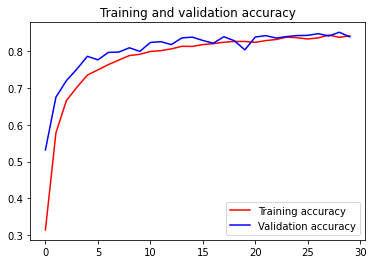

<Figure size 432x288 with 0 Axes>

In [32]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [34]:
model.save('model_capstone.h5')

In [44]:
def prediksii(img_path):
    img = load_img(img_path, target_size=(300, 300))
    
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0
    
    hasil = model.predict(x)
    return hasil

In [49]:
def test_img(path):
    img = load_img(path, target_size=(300, 300))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
#     boxes, scores, classes, nums = model.predict(x)
#     num_ingredients = nums[0]
#     return num_ingredients
    class_probabilities = model.predict(x)
    predicted_class_index = np.argmax(class_probabilities)
    class_names = list(train_generator.class_indices.keys())
    predicted_class_name = class_names[predicted_class_index]
    return predicted_class_name

In [54]:
test_img('./dada.jpg')

1/1 [==============================] - 0s 20ms/step


'Dada ayam'

In [57]:
tf.saved_model.save(model, 'saved_model')

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


In [59]:
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [60]:
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)